In [14]:
%load_ext autoreload
%autoreload 2
import features
import seaborn as sns
import numpy as np
import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
train, test, train_labels, specs = features.read_data()

Reading train.csv file....
Training.csv file have 11341042 rows and 11 columns
Reading test.csv file....
Test.csv file have 1156414 rows and 11 columns
Reading train_labels.csv file....
Train_labels.csv file have 17690 rows and 7 columns
Reading specs.csv file....
Specs.csv file have 386 rows and 3 columns


In [31]:
train.installation_id.unique().size

17000

In [ ]:
train.columns

In [168]:
train_labels.columns

Index(['game_session', 'installation_id', 'title', 'num_correct',
       'num_incorrect', 'accuracy', 'accuracy_group'],
      dtype='object')

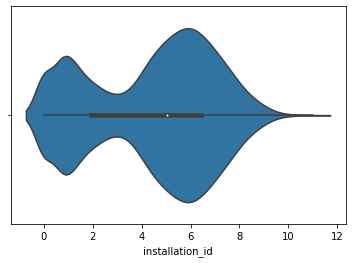

In [27]:
sns.violinplot(np.log(train.installation_id.value_counts()))

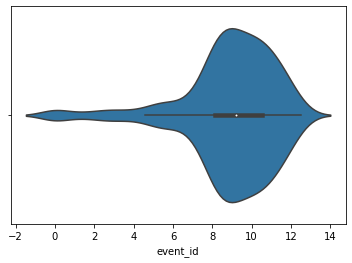

In [30]:
sns.violinplot(np.log(train.event_id.value_counts()))

In [10]:
def get_worst_score(group):
    return group.sort_values('accuracy_group').iloc[0]

labels = train_labels.groupby(['installation_id', 'title']).apply(get_worst_score).reset_index(drop=True)

In [42]:
feats = groups.apply(lambda x: features.summarize_events_before_game_session(x, game_session=x.name[1])).reset_index()

In [55]:
feats = features.get_basic_user_features(train, labels)

In [43]:
feats.head()

,installation_id,game_session_y,event_count,game_time,num_unique_days,elapsed_days,last_world,type_counts,unique_game_sessions,title_y,num_correct,num_incorrect,accuracy,accuracy_group
0,0006a69f,77b8ee947eb84b4e,80570,75295894,1,0 days,TREETOPCITY,Activity 556 Game 525 Assessment...,26,Bird Measurer (Assessment),0,11,0.0,0
1,0006a69f,9501794defd84e4d,135226,196920049,1,0 days,TREETOPCITY,Activity 1103 Game 845 Assessme...,48,Mushroom Sorter (Assessment),1,1,0.5,2
2,0006c192,197a373a77101924,141995,140663742,2,1 days,MAGMAPEAK,Activity 894 Game 633 Assessment...,26,Cauldron Filler (Assessment),1,0,1.0,3
3,0006c192,957406a905d59afd,195450,201045937,4,18 days,TREETOPCITY,Activity 1206 Game 643 Assessme...,48,Bird Measurer (Assessment),1,1,0.5,2
4,0006c192,b2297d292892745a,175327,179033827,4,18 days,TREETOPCITY,Activity 1206 Game 637 Assessme...,44,Mushroom Sorter (Assessment),0,4,0.0,0


In [56]:
feats.shape

(9386, 17)

In [57]:
train_labels.columns

Index(['game_session', 'installation_id', 'title', 'num_correct',
       'num_incorrect', 'accuracy', 'accuracy_group'],
      dtype='object')

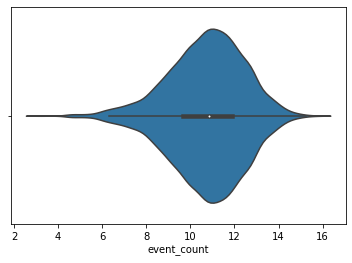

In [58]:
sns.violinplot(np.log(feats.event_count))

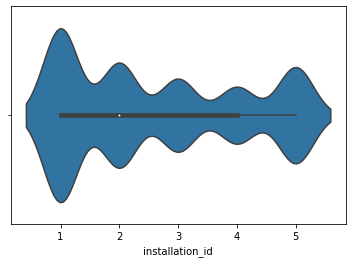

In [59]:
sns.violinplot(feats.installation_id.value_counts())

In [61]:
feats.to_csv('installation_features.csv', index=False)

In [54]:
feats.type_counts.apply(pd.Series)

,Activity,Game,Assessment,Clip
0,556.0,525.0,135.0,14.0
1,1103.0,845.0,229.0,24.0
2,894.0,633.0,24.0,15.0
3,1206.0,643.0,343.0,30.0
4,1206.0,637.0,143.0,28.0
...,...,...,...,...
9381,145.0,56.0,62.0,12.0
9382,145.0,380.0,145.0,15.0
9383,561.0,324.0,40.0,3.0
9384,381.0,941.0,247.0,24.0
